    # Automatic Jupyter Notebook for OpenML dataset 41021: Moneyball

In [11]:
%matplotlib inline
from scripts.preamble import *
did = 41021
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

No compatible runs found


""


In [12]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised regression problem.
Task is empty so cannot be checked, possibly due to a bug in OpenML


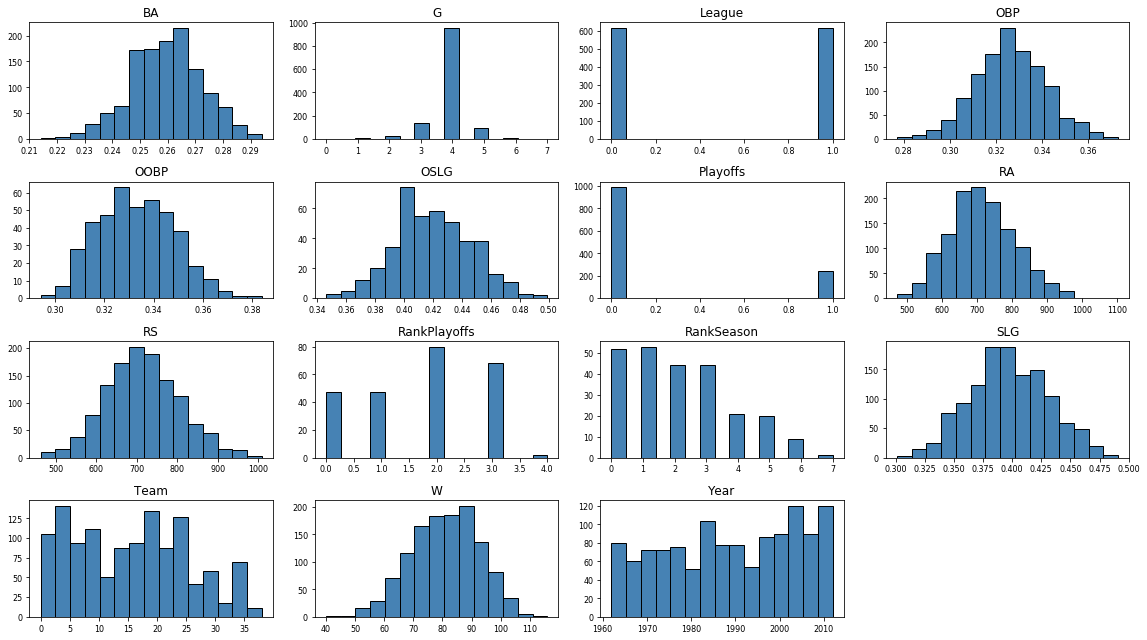

In [13]:
from scripts.dataVisualization import *
show1DHist(data) 

,Team,League,Year,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,outlier
50,20,1,2011,529,102,0.323,0.395,0.253,1,0,3,4,0.296,0.361,-0.103929
29,29,1,2012,594,98,0.322,0.428,0.261,1,0,3,4,0.303,0.373,-0.0920688
56,26,0,2011,614,91,0.322,0.402,0.244,1,5,3,4,0.303,0.383,-0.0855434
1100,9,0,1968,492,103,0.307,0.385,0.235,1,0,0,6,nan,nan,-0.0829387
55,25,1,2011,692,90,0.341,0.425,0.273,1,6,0,4,0.319,0.398,-0.0724838
418,27,0,1999,859,95,0.361,0.479,0.293,1,4,3,4,0.346,0.459,-0.0719529
448,27,0,1998,871,88,0.357,0.462,0.289,1,7,3,4,nan,nan,-0.0714274
354,23,0,2001,627,116,0.36,0.445,0.288,1,0,2,4,0.301,0.378,-0.0707103
325,24,1,2002,616,95,0.344,0.442,0.267,1,5,1,4,0.319,0.372,-0.069794
1021,2,0,1971,530,101,0.347,0.398,0.261,1,0,1,0,nan,nan,-0.0667465


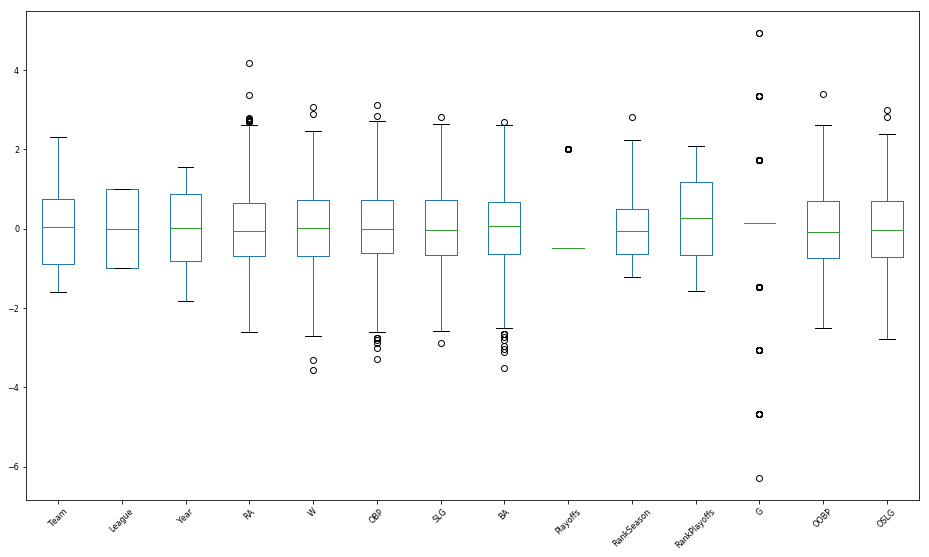

In [14]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [15]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

     did                  name  similarity                             url
0    541                socmob       0.964    https://www.openml.org/d/541
1    531                boston       0.961    https://www.openml.org/d/531
2   4137              Dorothea       0.660   https://www.openml.org/d/4137
3   1088  variousCancers_final       0.641   https://www.openml.org/d/1088
4   1086         ovarianTumour       0.627   https://www.openml.org/d/1086
5   1087            hepatitisC       0.627   https://www.openml.org/d/1087
6  41103                STL-10       0.598  https://www.openml.org/d/41103
7   1083             mouseType       0.593   https://www.openml.org/d/1083
8   1084       BurkittLymphoma       0.590   https://www.openml.org/d/1084
9   1165       AP_Breast_Ovary       0.576   https://www.openml.org/d/1165


Complexity threshold to determine if an algorithm will be run.


In [16]:
comp = 50000000000000

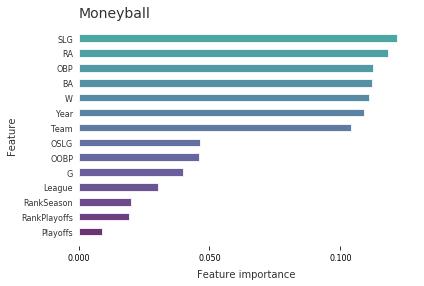

In [17]:
from scripts.featureImportance import *
featureImportance(data) 

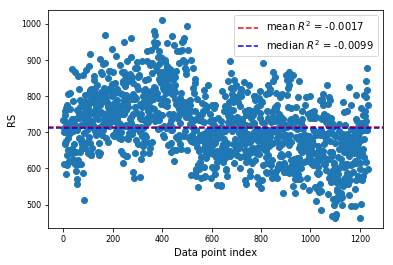

In [18]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [19]:
removeOutliers = False 

In [20]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, strats, maxBaseline, problemType) 

StopIteration: 

In [ ]:
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, strats, maxBaseline) 